In [161]:
import plotly
import plotly.graph_objs as go
import numpy as np
import pytraj as pt
import json
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

In [162]:
# Set a dict to change residue 3 letters code to residue 1 letter code:
residue_letters = {
    'PRO' : 'P',
    'HIS' : 'H',
    'ARG' : 'R',
    'LYS' : 'K',
    'ILE' : 'I',
    'PHE' : 'F',
    'LEU' : 'L',
    'TRP' : 'W',
    'ALA' : 'A',
    'MET' : 'M',
    'CYS' : 'C',
    'ASN' : 'N',
    'VAL' : 'V',
    'GLY' : 'G',
    'SER' : 'S',
    'GLN' : 'Q',
    'TYR' : 'Y',
    'ASP' : 'D',
    'GLU' : 'E',
    'THR' : 'T',
    'CYX' : 'C',
    'HIE' : 'H',
    'HSD' : 'H',
    'HSE' : 'H',
    'GLUP' : 'E',
}

In [207]:
def get_topology(traj_path):
    topfile='{path}/topology.json'.format(path=traj_path)
    #print(traj_path)
    with open(topfile) as top:
        topology=json.loads(top.read())
    return topology

In [209]:
def get_energy_data(traj_path):
    energy_file='{path}/traj/mda.energies.json'.format(path=traj_path)
    with open(energy_file) as e:
        energies_json=json.loads(e.read())
    energy_data = energies_json['data']
    #print(analysis_data)
    interaction_data=energy_data[0]
    return interaction_data

In [212]:
# Set a function to get interaction residue indices from a specific simulation
def get_interaction_residue_indices(traj_path):
    int_file='{path}/traj/mda.interactions.json'.format(path=traj_path)
    with open(int_file) as int:
        interactions=json.loads(int.read())
    interaction0 = interactions[0] #in this case it's the first and only
    agent1_indices=interaction0['residue_indices_1']
    agent2_indices=interaction0['residue_indices_2']
    #print(agent1_indices, agent2_indices)
    return agent1_indices,agent2_indices


# Glu int interactions

In [213]:
traj_path_md='/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluint/mut_Glu-_ave'
traj_path_wd='/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluint/wt_Glu-_ave'

In [230]:
trpath=traj_path_wd

top = get_topology(trpath)
resids = top['residue_numbers']
resnames = top['residue_names']
ag1_idx,ag2_idx=get_interaction_residue_indices(trpath)
#print(resids, resids[0], ag2_idx)
#print(len(ag2_idx))
#print(len(ag2_resids))

ag2_resids = [ resids[res_idx] for res_idx in ag2_idx ]
ag1_resids = [ resids[res_idx] for res_idx in ag1_idx ]
ag2_newresids=[res+57 for res in ag2_resids]
ag1_newresids=[res+57 for res in ag1_resids]
ag2_resnames = [ resnames[res_idx] for res_idx in ag2_idx ]
ag1_resnames = [ resnames[res_idx] for res_idx in ag1_idx ]
ag2_letters=[ residue_letters[resname] for resname in ag2_resnames ]
ag1_letters=[ residue_letters[resname] for resname in ag1_resnames ]
#target_residue_names = [ residue_names[residue_index] for residue_index in target_indices ]
#target_residue_letters = [ residue_letters[residue_name] for residue_name in target_residue_names ]
#sequence = ''.join(target_residue_letters)


/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluint/wt_Glu-_ave


In [225]:
int_data=get_energy_data(trpath)
sum_es_vdw=int_data['agent1']['both']
sum_vdw=int_data['agent1']['vdw']
sum_es=int_data['agent1']['es']
perres_es_vdw=int_data['agent2']['both']
perres_vdw=int_data['agent2']['vdw']
perres_es=int_data['agent2']['es']

In [237]:
ag1_letters

['E']

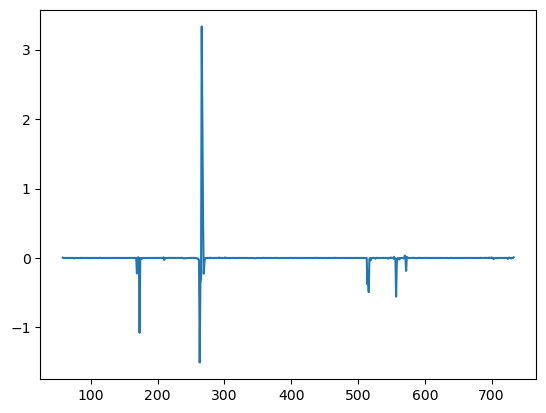

In [227]:
plt.plot(ag2_newresids,perres_es_vdw)

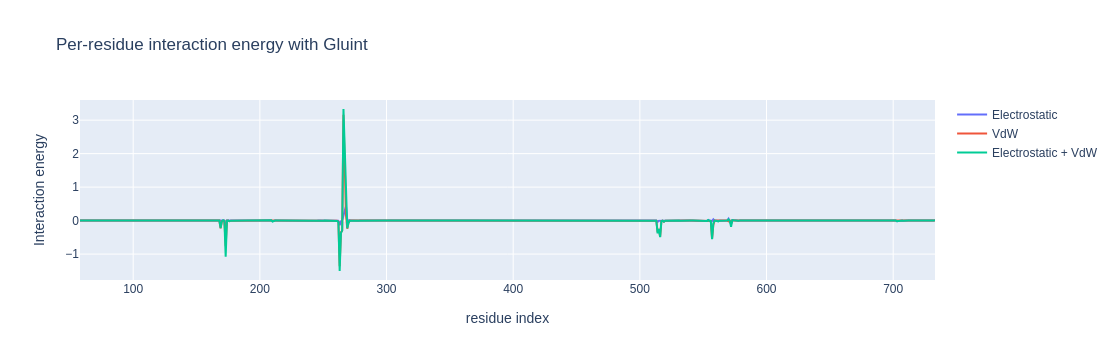

In [228]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=ag2_newresids, y=perres_es, name='Electrostatic', mode='lines'))
fig.add_trace(go.Scatter(x=ag2_newresids, y=perres_vdw, name='VdW', mode='lines'))
fig.add_trace(go.Scatter(x=ag2_newresids, y=perres_es_vdw, name='Electrostatic + VdW', mode='lines'))
fig.update_layout(title='Per-residue interaction energy with Gluint', xaxis_title='residue index', yaxis_title='Interaction energy')
#fig.show()
fig.write_html('interactive_plot.html')
fig.show()

# Glu ext interactions

In [249]:
traj_path_mp='/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluext/mut_Glu0_ave'
traj_path_wp='/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluext/wt_Glu0_ave'

In [250]:
trpath=traj_path_wp

top = get_topology(trpath)
resids = top['residue_numbers']
resnames = top['residue_names']
ag1_idx,ag2_idx=get_interaction_residue_indices(trpath)
#print(resids, resids[0], ag2_idx)
#print(len(ag2_idx))
#print(len(ag2_resids))

ag2_resids = [ resids[res_idx] for res_idx in ag2_idx ]
ag1_resids = [ resids[res_idx] for res_idx in ag1_idx ]
ag2_newresids=[res+57 for res in ag2_resids]
ag1_newresids=[res+57 for res in ag1_resids]
ag2_resnames = [ resnames[res_idx] for res_idx in ag2_idx ]
ag1_resnames = [ resnames[res_idx] for res_idx in ag1_idx ]
ag2_letters=[ residue_letters[resname] for resname in ag2_resnames ]
ag1_letters=[ residue_letters[resname] for resname in ag1_resnames ]
#target_residue_names = [ residue_names[residue_index] for residue_index in target_indices ]
#target_residue_letters = [ residue_letters[residue_name] for residue_name in target_residue_names ]
#sequence = ''.join(target_residue_letters)

/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/mw_metad/trajs_mon/phase2/mwf_Gluext/wt_Glu0_ave


In [251]:
int_data=get_energy_data(trpath)
sum_es_vdw=int_data['agent2']['both']
sum_vdw=int_data['agent2']['vdw']
sum_es=int_data['agent2']['es']
perres_es_vdw=int_data['agent1']['both']
perres_vdw=int_data['agent1']['vdw']
perres_es=int_data['agent1']['es']

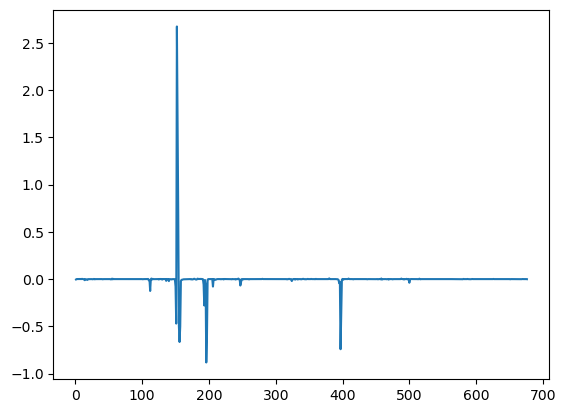

In [252]:
plt.plot(ag1_resids,perres_es_vdw)

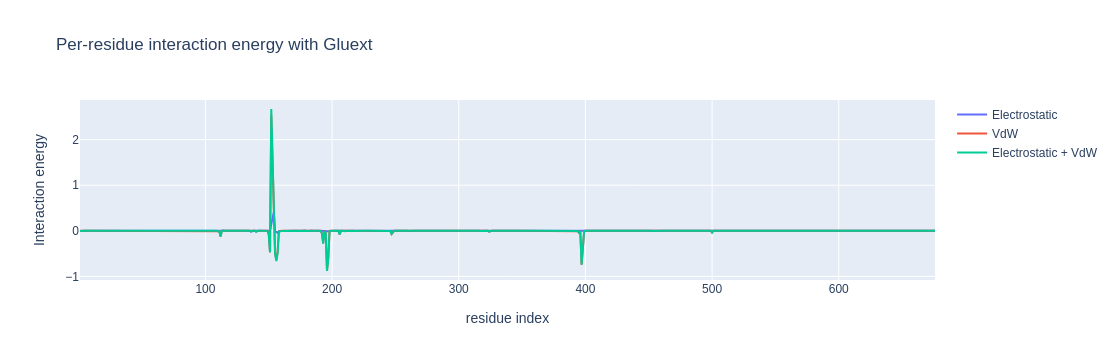

In [253]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=ag1_resids, y=perres_es, name='Electrostatic', mode='lines'))
fig.add_trace(go.Scatter(x=ag1_resids, y=perres_vdw, name='VdW', mode='lines'))
fig.add_trace(go.Scatter(x=ag1_resids, y=perres_es_vdw, name='Electrostatic + VdW', mode='lines'))
fig.update_layout(title='Per-residue interaction energy with Gluext', xaxis_title='residue index', yaxis_title='Interaction energy')
#fig.show()
fig.write_html('interactive_plot.html')
fig.show()